In [1]:
import deepchem as dc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import rdkit
from mordred import Calculator, descriptors
import json

%matplotlib inline

In [2]:
raw_data = pd.read_csv(
    "data/Spike-ACE2_protein-protein_interaction_AlphaLISA.tsv", sep="\t"
)
raw_data.head()

,SAMPLE_ID,SAMPLE_NAME,PUBCHEM_SID,PRIMARY_MOA,ASSAY_NAME,LIBRARY,CAS,ALIAS,AC50(uM),LOG_AC50,...,CONC5(M),CONC6(M),CONC7(M),CONC8(M),CONC9(M),CONC10(M),CONC11(M),CONC12(M),CONC13(M),CONC14(M)
0,NCGC00181749-01,Cefminox sodium,144206473.0,Peptidoglycan biosynthesis Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),75498-96-3,Cefminox; Tencef; Meicelin; Alteporina;,NaN,NaN,...,0.000011,0.000057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCGC00167506-04,Pimecrolimus,405558652.0,Macrolide Antibiotic,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),137071-32-0,NaN,10.621291,-4.973823,...,0.000011,0.000057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCGC00165825-02,Milnacipran hydrochloride,225144261.0,Serotonin transporter Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),101152-94-7,NaN,NaN,NaN,...,0.000011,0.000057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCGC00182029-01,Fosfluconazole,144206487.0,Cytochrome P450 51 Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),194798-83-9,Fosfluconazole; Prodif;,NaN,NaN,...,0.000011,0.000057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCGC00167559-01,Androstenone,144206107.0,NaN,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),18339-16-7,5A-ANDROSTA-16-ENE-3-ONE; Androstenone;,NaN,NaN,...,0.000011,0.000057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data.shape

(3406, 53)

In [4]:
raw_data.isna().sum()

SAMPLE_ID          0
SAMPLE_NAME        1
PUBCHEM_SID      518
PRIMARY_MOA     1126
ASSAY_NAME         0
LIBRARY            0
CAS              230
ALIAS           2659
AC50(uM)        2366
LOG_AC50        2366
AUC                0
CURVE_CLASS2       0
DATA_POINTS        0
DRUG_NAME       3094
EFFICACY           0
MAX_RESPONSE       0
P_HILL          1418
R2              1418
GENE_ID         2952
GENE_SYMBOL     2441
SMILES             0
SUPPLIER           0
SUPPLIER_ID        6
DATA0              0
DATA1              0
DATA2              0
DATA3              0
DATA4              0
DATA5              0
DATA6              0
DATA7           3406
DATA8           3406
DATA9           3406
DATA10          3406
DATA11          3406
DATA12          3406
DATA13          3406
DATA14          3406
CONC0(M)           0
CONC1(M)           0
CONC2(M)           0
CONC3(M)           0
CONC4(M)           0
CONC5(M)           0
CONC6(M)           0
CONC7(M)        3406
CONC8(M)        3406
CONC9(M)     

In [5]:
clean_data = raw_data.drop(
    columns=[
        "DATA7",
        "DATA8",
        "DATA9",
        "DATA10",
        "DATA11",
        "DATA12",
        "DATA13",
        "DATA14",
        "CONC7(M)",
        "CONC8(M)",
        "CONC9(M)",
        "CONC10(M)",
        "CONC11(M)",
        "CONC12(M)",
        "CONC13(M)",
        "CONC14(M)",
    ]
)

In [6]:
clean_data.head()

,SAMPLE_ID,SAMPLE_NAME,PUBCHEM_SID,PRIMARY_MOA,ASSAY_NAME,LIBRARY,CAS,ALIAS,AC50(uM),LOG_AC50,...,DATA4,DATA5,DATA6,CONC0(M),CONC1(M),CONC2(M),CONC3(M),CONC4(M),CONC5(M),CONC6(M)
0,NCGC00181749-01,Cefminox sodium,144206473.0,Peptidoglycan biosynthesis Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),75498-96-3,Cefminox; Tencef; Meicelin; Alteporina;,NaN,NaN,...,0.000000,0.0,0.000000,3.660000e-09,1.830000e-08,9.140000e-08,4.570000e-07,0.000002,0.000011,0.000057
1,NCGC00167506-04,Pimecrolimus,405558652.0,Macrolide Antibiotic,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),137071-32-0,NaN,10.621291,-4.973823,...,-12.106538,-46.3,-78.982672,3.660000e-09,1.830000e-08,9.140000e-08,4.570000e-07,0.000002,0.000011,0.000057
2,NCGC00165825-02,Milnacipran hydrochloride,225144261.0,Serotonin transporter Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),101152-94-7,NaN,NaN,NaN,...,-3.486683,-8.0,0.000000,3.660000e-09,1.830000e-08,9.140000e-08,4.570000e-07,0.000002,0.000011,0.000057
3,NCGC00182029-01,Fosfluconazole,144206487.0,Cytochrome P450 51 Inhibitor,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),194798-83-9,Fosfluconazole; Prodif;,NaN,NaN,...,-2.130751,-7.9,0.000000,3.660000e-09,1.830000e-08,9.140000e-08,4.570000e-07,0.000002,0.000011,0.000057
4,NCGC00167559-01,Androstenone,144206107.0,NaN,Spike-ACE2 protein-protein interaction (AlphaL...,Approved Drugs Collection (NPC),18339-16-7,5A-ANDROSTA-16-ENE-3-ONE; Androstenone;,NaN,NaN,...,0.000000,0.0,0.000000,3.660000e-09,1.830000e-08,9.140000e-08,4.570000e-07,0.000002,0.000011,0.000057


In [7]:
clean_data.iloc[10]

SAMPLE_ID                                         NCGC00182551-01
SAMPLE_NAME                                             Cythioate
PUBCHEM_SID                                           1.44207e+08
PRIMARY_MOA     Acetylcholinesterase and butyrylcholinesterase...
ASSAY_NAME      Spike-ACE2 protein-protein interaction (AlphaL...
LIBRARY                           Approved Drugs Collection (NPC)
CAS                                                      115-93-5
ALIAS                                         Cythioate; Cyflee; 
AC50(uM)                                                      NaN
LOG_AC50                                                      NaN
AUC                                                      -11.7052
CURVE_CLASS2                                                    4
DATA_POINTS                                                     7
DRUG_NAME       Cyflee;CIPLUS_151430;CYTHIOATE;Cythioate;cythi...
EFFICACY                                                    -10.8
MAX_RESPON

In [8]:
df = clean_data[["SAMPLE_ID", "SMILES", "EFFICACY"]]

In [9]:
def get_mols(row):
    try:
        mol = rdkit.Chem.MolFromSmiles(row["SMILES"])
        return mol
    except:
        return np.nan

In [10]:
df["mols"] = df.apply(get_mols, axis=1)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
clean_df = df.dropna(subset=["mols"])

In [12]:
# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

molecules_series = clean_df["mols"]
dataset = calc.pandas(molecules_series)

  1%|          | 20/3333 [00:07<38:13,  1.44it/s] 

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 83/3333 [00:12<07:33,  7.16it/s]

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|▍         | 137/3333 [00:22<15:50,  3.36it/s]

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|▌         | 169/3333 [00:28<10:57,  4.81it/s]

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 3333/3333 [09:12<00:00,  6.03it/s]


In [13]:
dataset.shape

(3333, 1613)

In [14]:
dataset

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,25.217556,20.924669,4,2,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.753446,84.393663,541.048403,10.019415,3300003492,53,172.0,207.0,divide by zero encountered in power (mZagreb1),7.361111
1,42.513446,32.175596,0,0,70.314,2.51627,5.03238,70.314,1.25561,4.92973,...,10.972482,94.846111,809.448090,6.527807,12071,104,288.0,342.0,23.0347,12.597222
2,13.319150,13.380720,0,1,23.1974,2.62977,4.98713,23.1974,1.28875,3.84598,...,10.087433,72.188173,246.173213,6.154330,572,29,92.0,114.0,6.75694,4.319444
3,20.392476,18.274345,2,0,31.7612,2.49514,4.9777,31.7612,1.22159,4.18823,...,10.203111,76.220112,386.070396,9.899241,1475,36,138.0,159.0,9.18056,5.527778
4,16.424974,13.265580,0,0,26.2932,2.59403,5.16037,26.2932,1.31466,3.9842,...,10.459870,69.126315,272.214016,5.671125,699,40,120.0,151.0,6.18056,4.097222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,24.098650,17.680148,0,0,41.81,2.4105,4.82101,41.81,1.30656,4.36379,...,10.076558,67.211711,433.211390,7.342566,3677,45,154.0,174.0,9.27778,7.444444
3402,15.343821,13.549025,0,0,24.2176,2.41884,4.73319,24.2176,1.21088,3.9114,...,9.806591,67.407254,314.983542,11.666057,818,29,102.0,118.0,8.38889,4.361111
3403,6.542301,7.037090,0,0,11.2527,2.13578,4.27156,11.2527,1.12527,3.12453,...,8.313607,37.579015,143.131014,5.301149,131,10,38.0,39.0,5.22222,2.611111
3404,14.125824,12.901542,1,0,21.2939,2.53016,4.85647,21.2939,1.183,3.858,...,10.025661,72.018567,288.032000,9.001000,660,24,98.0,115.0,8.06944,3.694444


### EDA

In [15]:
thrs = 40
y = np.abs(clean_df["EFFICACY"]) > thrs

In [16]:
columns_list = dataset.columns

In [17]:
full_dataset = dataset.copy()
full_dataset["y"] = y

In [18]:
np.unique(full_dataset.astype("float64").isna().sum(), return_counts=True)

(array([   0,    2,    5,    7,   10,   11,   14,   31,   34,   36,   38,
          42,   63,   66,   72,  117,  120,  124,  130,  140,  143,  153,
         205,  208,  227,  355,  357,  359,  364,  388,  463,  465,  466,
         470,  495,  547,  566,  772,  783,  798,  931,  938,  943, 1002,
        1010, 1343, 1550, 1603, 1692, 1748, 2092, 2133, 2282, 2316, 2347,
        2363, 2365, 2444, 2481, 2509, 2625, 2673, 2737, 2753, 2768, 2836,
        2902, 2928, 2930, 2952, 3004, 3047, 3116, 3145, 3148, 3156, 3171,
        3205, 3239, 3240, 3247, 3249, 3272, 3284, 3285, 3287, 3308, 3309,
        3323, 3324, 3326, 3330, 3331, 3332, 3333], dtype=int64),
 array([838,  39,  67,   4,  40,   2,   4,  21,   5,   3,  36,   4,   3,
          2,   2,  36,   5,   1,   2,   3,   1,   1,  36,   4,   3,  31,
          4,   4,   4,   4,   4, 175,  17,  15,   2,   4,   2,   2,   2,
          2,   2,   1,   1,   1,   2,   2,   2,   1,   2,   1,   2,   2,
          1,   1,   2,   1,   1,   2,   1,   1,   2

In [19]:
full_nan = full_dataset.astype("float64").isna().sum() == 3333

In [20]:
full_nan_list = list(full_nan[full_nan == True].index)

In [21]:
for i in range(dataset[full_nan_list].shape[1]):
    print(dataset[full_nan_list].iloc[:, i])

0                           multiple fragments (SpAbs_Dt)
1       module 'networkx' has no attribute 'biconnecte...
2       module 'networkx' has no attribute 'biconnecte...
3       module 'networkx' has no attribute 'biconnecte...
4       module 'networkx' has no attribute 'biconnecte...
                              ...                        
3401    module 'networkx' has no attribute 'biconnecte...
3402    module 'networkx' has no attribute 'biconnecte...
3403    module 'networkx' has no attribute 'biconnecte...
3404    module 'networkx' has no attribute 'biconnecte...
3405    module 'networkx' has no attribute 'biconnecte...
Name: SpAbs_Dt, Length: 3333, dtype: object
0                           multiple fragments (SpMax_Dt)
1       module 'networkx' has no attribute 'biconnecte...
2       module 'networkx' has no attribute 'biconnecte...
3       module 'networkx' has no attribute 'biconnecte...
4       module 'networkx' has no attribute 'biconnecte...
                            

Name: MAXssBH, Length: 3333, dtype: object
0       max() arg is an empty sequence (MAXssssB)
1       max() arg is an empty sequence (MAXssssB)
2       max() arg is an empty sequence (MAXssssB)
3       max() arg is an empty sequence (MAXssssB)
4       max() arg is an empty sequence (MAXssssB)
                          ...                    
3401    max() arg is an empty sequence (MAXssssB)
3402    max() arg is an empty sequence (MAXssssB)
3403    max() arg is an empty sequence (MAXssssB)
3404    max() arg is an empty sequence (MAXssssB)
3405    max() arg is an empty sequence (MAXssssB)
Name: MAXssssB, Length: 3333, dtype: object
0       max() arg is an empty sequence (MAXsSiH3)
1       max() arg is an empty sequence (MAXsSiH3)
2       max() arg is an empty sequence (MAXsSiH3)
3       max() arg is an empty sequence (MAXsSiH3)
4       max() arg is an empty sequence (MAXsSiH3)
                          ...                    
3401    max() arg is an empty sequence (MAXsSiH3)
3402    max()

Name: MAXdSe, Length: 3333, dtype: object
0       max() arg is an empty sequence (MAXdssSe)
1       max() arg is an empty sequence (MAXdssSe)
2       max() arg is an empty sequence (MAXdssSe)
3       max() arg is an empty sequence (MAXdssSe)
4       max() arg is an empty sequence (MAXdssSe)
                          ...                    
3401    max() arg is an empty sequence (MAXdssSe)
3402    max() arg is an empty sequence (MAXdssSe)
3403    max() arg is an empty sequence (MAXdssSe)
3404    max() arg is an empty sequence (MAXdssSe)
3405    max() arg is an empty sequence (MAXdssSe)
Name: MAXdssSe, Length: 3333, dtype: object
0       max() arg is an empty sequence (MAXddssSe)
1       max() arg is an empty sequence (MAXddssSe)
2       max() arg is an empty sequence (MAXddssSe)
3       max() arg is an empty sequence (MAXddssSe)
4       max() arg is an empty sequence (MAXddssSe)
                           ...                    
3401    max() arg is an empty sequence (MAXddssSe)
3402   

Name: MINssSiH2, Length: 3333, dtype: object
0       min() arg is an empty sequence (MINsssSiH)
1       min() arg is an empty sequence (MINsssSiH)
2       min() arg is an empty sequence (MINsssSiH)
3       min() arg is an empty sequence (MINsssSiH)
4       min() arg is an empty sequence (MINsssSiH)
                           ...                    
3401    min() arg is an empty sequence (MINsssSiH)
3402    min() arg is an empty sequence (MINsssSiH)
3403    min() arg is an empty sequence (MINsssSiH)
3404    min() arg is an empty sequence (MINsssSiH)
3405    min() arg is an empty sequence (MINsssSiH)
Name: MINsssSiH, Length: 3333, dtype: object
0       min() arg is an empty sequence (MINsPH2)
1       min() arg is an empty sequence (MINsPH2)
2       min() arg is an empty sequence (MINsPH2)
3       min() arg is an empty sequence (MINsPH2)
4       min() arg is an empty sequence (MINsPH2)
                          ...                   
3401    min() arg is an empty sequence (MINsPH2)
3402  

Name: MINddssSe, Length: 3333, dtype: object
0       min() arg is an empty sequence (MINsSnH3)
1       min() arg is an empty sequence (MINsSnH3)
2       min() arg is an empty sequence (MINsSnH3)
3       min() arg is an empty sequence (MINsSnH3)
4       min() arg is an empty sequence (MINsSnH3)
                          ...                    
3401    min() arg is an empty sequence (MINsSnH3)
3402    min() arg is an empty sequence (MINsSnH3)
3403    min() arg is an empty sequence (MINsSnH3)
3404    min() arg is an empty sequence (MINsSnH3)
3405    min() arg is an empty sequence (MINsSnH3)
Name: MINsSnH3, Length: 3333, dtype: object
0       min() arg is an empty sequence (MINssSnH2)
1       min() arg is an empty sequence (MINssSnH2)
2       min() arg is an empty sequence (MINssSnH2)
3       min() arg is an empty sequence (MINssSnH2)
4       min() arg is an empty sequence (MINssSnH2)
                           ...                    
3401    min() arg is an empty sequence (MINssSnH2)
3402

In [22]:
nan_count = []
nan_dataset = full_dataset.astype("float64").isna()
for column_name in columns_list:
    tf = nan_dataset[(y == True) & (nan_dataset[column_name] == False)][
        column_name
    ].count()
    tt = nan_dataset[(y == True) & (nan_dataset[column_name] == True)][
        column_name
    ].count()
    ft = nan_dataset[(y == False) & (nan_dataset[column_name] == True)][
        column_name
    ].count()
    ff = nan_dataset[(y == False) & (nan_dataset[column_name] == False)][
        column_name
    ].count()
    nan_count.append([tf, ff, tt, ft])
nan_count = np.array(nan_count)

In [23]:
nan_dataset

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,y
0,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3404,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
nan_count

array([[ 766, 2567,    0,    0],
       [ 766, 2567,    0,    0],
       [ 766, 2567,    0,    0],
       ...,
       [ 766, 2567,    0,    0],
       [ 715, 2263,   51,  304],
       [ 766, 2567,    0,    0]])

(array([1216.,  215.,    9.,    0.,    7.,    3.,   12.,    5.,   14.,
         132.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

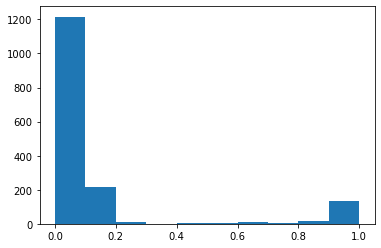

In [25]:
plt.hist(nan_count[:, 2] / (nan_count[:, 0] + nan_count[:, 2]))

(array([1161.,  266.,   10.,    5.,    3.,    3.,    4.,   12.,   14.,
         135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

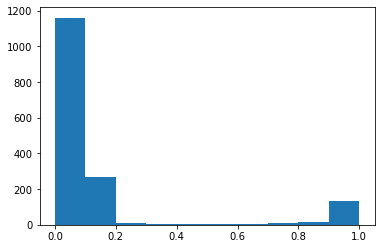

In [26]:
plt.hist(nan_count[:, 3] / (nan_count[:, 1] + nan_count[:, 3]))

In [27]:
nan_ratio = np.array(
    [
        nan_count[:, 2] / (nan_count[:, 0] + nan_count[:, 2]),
        nan_count[:, 3] / (nan_count[:, 1] + nan_count[:, 3]),
    ]
).T

In [28]:
nan_ratio

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.        , 0.        ],
       [0.06657963, 0.11842618],
       [0.        , 0.        ]])

(array([   7.,    4.,   11.,   73.,  300.,   79., 1126.,    8.,    3.,
           2.]),
 array([-0.14479622, -0.12188975, -0.09898328, -0.07607681, -0.05317034,
        -0.03026386, -0.00735739,  0.01554908,  0.03845555,  0.06136203,
         0.0842685 ]),
 <BarContainer object of 10 artists>)

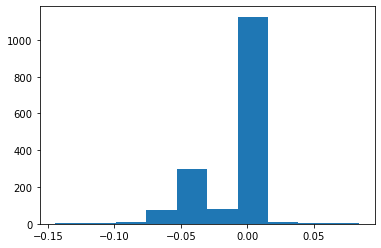

In [29]:
plt.hist(nan_ratio[:, 0] - nan_ratio[:, 1])

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [31]:
np.unique(y, return_counts=True)

(array([False,  True]), array([2567,  766], dtype=int64))

In [32]:
dataset_float = dataset.astype("float64")

In [33]:
clean_dataset = dataset_float.dropna(axis=1)

In [34]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(
    clean_dataset, y, test_size=0.2, stratify=y
)

In [35]:
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train_temp)

In [37]:
X_test = sc.transform(X_test_temp)

### PCA

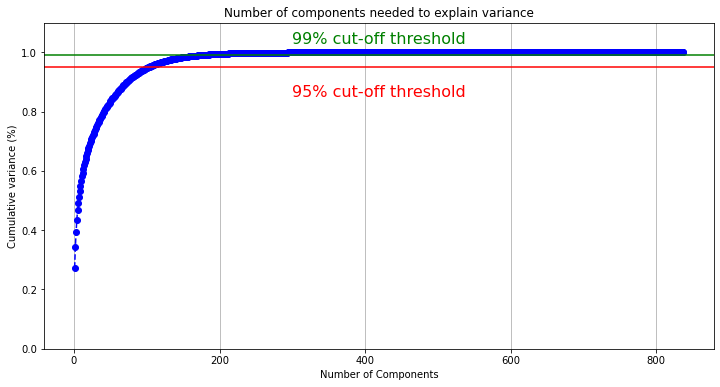

In [38]:
pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, X_train.shape[1] + 1, step=1)
y_pca = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y_pca, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance (%)")
plt.title("Number of components needed to explain variance")

plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(300.0, 0.85, "95% cut-off threshold", color="red", fontsize=16)

plt.axhline(y=0.99, color="g", linestyle="-")
plt.text(300.0, 1.03, "99% cut-off threshold", color="green", fontsize=16)

ax.grid(axis="x")
plt.show()

In [39]:
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

### Random Forest

In [40]:
model_rf = RandomForestClassifier()

In [41]:
cross_val_score(model_rf, X_train, y_train, scoring="roc_auc", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished


array([0.86002809, 0.86043636, 0.86844362, 0.85485822, 0.83526671])

In [42]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
np.mean(model_rf.predict(X_test) == y_test)

0.8530734632683659

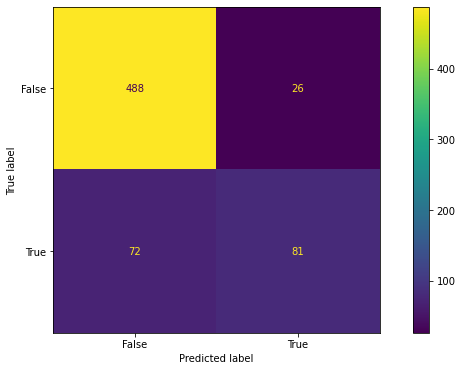

In [44]:
plot_confusion_matrix(model_rf, X_test, y_test)

In [45]:
GS_RF = GridSearchCV(
    RandomForestClassifier(n_jobs=-1),
    param_grid={
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [25, 50, 100, 200, None],
    },
    verbose=1,
    scoring="roc_auc",
)
GS_RF.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.7min finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [25, 50, 100, 200, None],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=1)

In [46]:
best_GS_RF = GS_RF.best_estimator_
best_GS_RF

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [47]:
GS_RF.best_score_

0.8642417109867624

### Ridge Classifier

In [48]:
model_rc = RidgeClassifier()

In [49]:
cross_val_score(model_rc, X_train, y_train, scoring="roc_auc", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


array([0.85389591, 0.84557856, 0.85995772, 0.83432481, 0.81222487])

In [50]:
model_rc.fit(X_train, y_train)

RidgeClassifier()

In [51]:
np.mean(model_rc.predict(X_test) == y_test)

0.8425787106446777

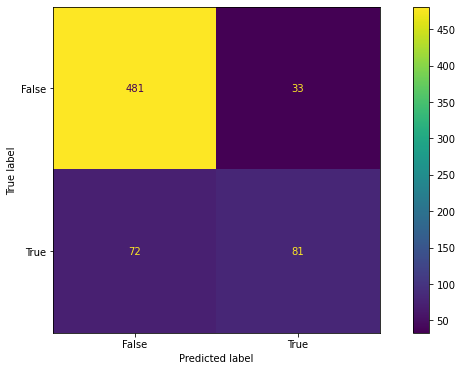

In [52]:
plot_confusion_matrix(model_rc, X_test, y_test)

In [53]:
GS_RC = GridSearchCV(
    RidgeClassifier(class_weight="balanced"),
    param_grid={"alpha": [1, 10, 100, 10 ** 3, 10 ** 4, 10 ** 5]},
    verbose=1,
    scoring="roc_auc",
)
GS_RC.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.6s finished


GridSearchCV(estimator=RidgeClassifier(class_weight='balanced'),
             param_grid={'alpha': [1, 10, 100, 1000, 10000, 100000]},
             scoring='roc_auc', verbose=1)

In [54]:
best_GS_RC = GS_RC.best_estimator_
best_GS_RC

RidgeClassifier(alpha=100, class_weight='balanced')

In [55]:
GS_RC.best_score_

0.8495798707795184

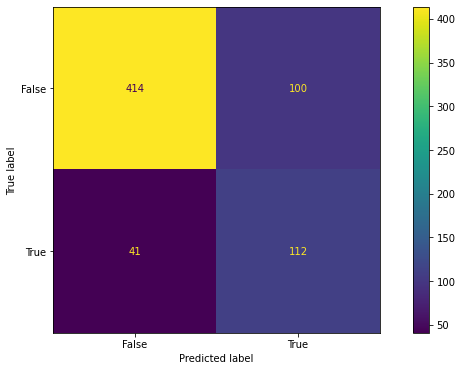

In [56]:
plot_confusion_matrix(GS_RC.best_estimator_, X_test, y_test)

### Ridge Classifier PCA

In [57]:
model_rc_PCA = RidgeClassifier()

In [58]:
cross_val_score(
    model_rc_PCA, X_train_PCA, y_train, scoring="roc_auc", n_jobs=-1, verbose=2
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.81423457, 0.80180288, 0.86109449, 0.85810034, 0.78874678])

In [59]:
model_rc_PCA.fit(X_train_PCA, y_train)

RidgeClassifier()

In [60]:
np.mean(model_rc_PCA.predict(X_test_PCA) == y_test)

0.8320839580209896

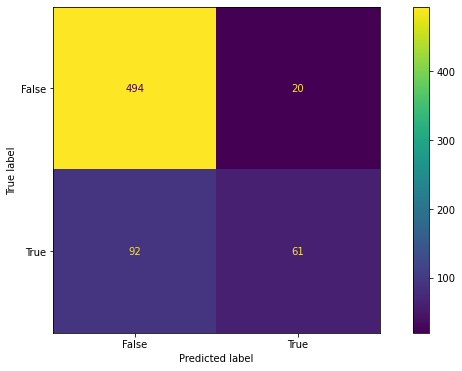

In [61]:
plot_confusion_matrix(model_rc_PCA, X_test_PCA, y_test)

In [62]:
GS_RC_PCA = GridSearchCV(
    RidgeClassifier(class_weight="balanced"),
    param_grid={"alpha": [1, 10, 100, 10 ** 3, 10 ** 4, 10 ** 5]},
    verbose=1,
    scoring="roc_auc",
)
GS_RC_PCA.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(estimator=RidgeClassifier(class_weight='balanced'),
             param_grid={'alpha': [1, 10, 100, 1000, 10000, 100000]},
             scoring='roc_auc', verbose=1)

In [63]:
best_GS_RC_PCA = GS_RC_PCA.best_estimator_
best_GS_RC_PCA

RidgeClassifier(alpha=1000, class_weight='balanced')

In [64]:
GS_RC_PCA.best_score_

0.8409391193772724

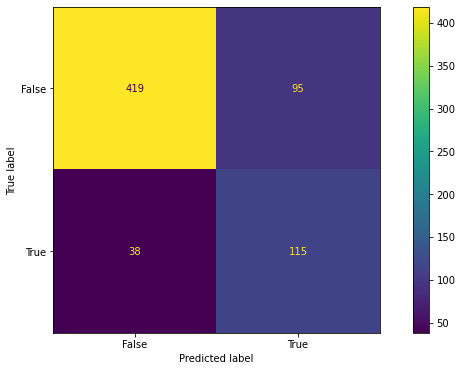

In [65]:
plot_confusion_matrix(GS_RC_PCA.best_estimator_, X_test_PCA, y_test)

### Gradient Boosting Classifier

In [66]:
model_gbc = GradientBoostingClassifier()

In [67]:
cross_val_score(model_gbc, X_train, y_train, scoring="roc_auc", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


array([0.85763456, 0.86079534, 0.85979817, 0.86524886, 0.85834821])

In [68]:
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
np.mean(model_gbc.predict(X_test) == y_test)

0.8500749625187406

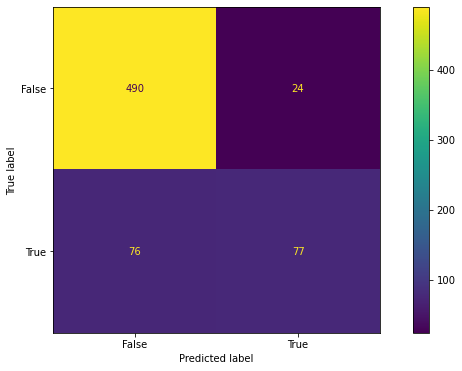

In [70]:
plot_confusion_matrix(model_gbc, X_test, y_test)

### SVM

In [71]:
model_svc = SVC()

In [72]:
cross_val_score(model_svc, X_train, y_train, scoring="roc_auc", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


array([0.86499318, 0.85943919, 0.87625145, 0.86964109, 0.8388955 ])

In [73]:
model_svc.fit(X_train, y_train)

SVC()

In [74]:
np.mean(model_svc.predict(X_test) == y_test)

0.8380809595202399

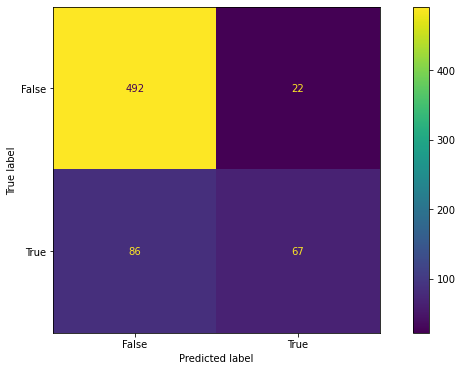

In [75]:
plot_confusion_matrix(model_svc, X_test, y_test)

In [76]:
GS_SVC = GridSearchCV(
    SVC(class_weight="balanced"),
    param_grid={"C": [1, 10, 20, 100]},
    verbose=1,
    scoring="roc_auc",
)
GS_SVC.fit(X_train, y_train)
# "kernel": ["linear", "poly", "rbf", "sigmoid"]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 10, 20, 100]}, scoring='roc_auc', verbose=1)

In [77]:
GS_SVC.best_estimator_

SVC(C=1, class_weight='balanced')

In [78]:
GS_SVC.best_score_

0.8638947529013634

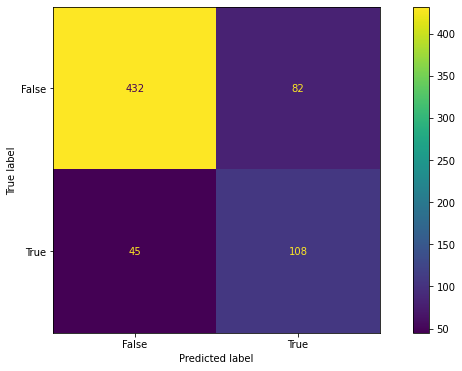

In [79]:
plot_confusion_matrix(GS_SVC.best_estimator_, X_test, y_test)

### ROC Curves

In [80]:
proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thrs_rf = roc_curve(y_test, proba_rf)
roc_auc_score(y_test, proba_rf)

0.8802166781109331

In [81]:
decision_rc = best_GS_RC.decision_function(X_test)
fpr_rc, tpr_rc, thrs_rc = roc_curve(y_test, decision_rc)
roc_auc_score(y_test, decision_rc)

0.8546196688792248

In [82]:
decision_rc_pca = best_GS_RC_PCA.decision_function(X_test_PCA)
fpr_rc_pca, tpr_rc_pca, thrs_rc_pca = roc_curve(y_test, decision_rc_pca)
roc_auc_score(y_test, decision_rc_pca)

0.852210015004705

In [83]:
proba_gbc = model_gbc.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, thrs_gbc = roc_curve(y_test, proba_gbc)
roc_auc_score(y_test, proba_gbc)

0.8802039622593525

In [84]:
decision_svc = model_svc.decision_function(X_test)
fpr_svc, tpr_svc, thrs_svc = roc_curve(y_test, decision_svc)
roc_auc_score(y_test, decision_svc)

0.8477086035451794

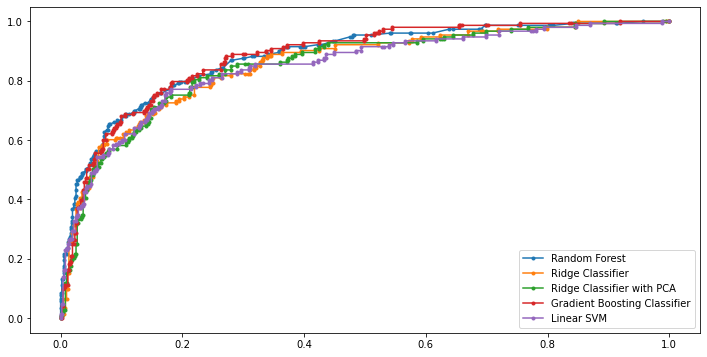

In [85]:
plt.plot(fpr_rf, tpr_rf, marker=".", label="Random Forest")
plt.plot(fpr_rc, tpr_rc, marker=".", label="Ridge Classifier")
plt.plot(fpr_rc_pca, tpr_rc_pca, marker=".", label="Ridge Classifier with PCA")
plt.plot(fpr_gbc, tpr_gbc, marker=".", label="Gradient Boosting Classifier")
plt.plot(fpr_svc, tpr_svc, marker=".", label="Linear SVM")
plt.legend()